In [3]:
import numpy as np
from UZ_utils import *
from a2_utils import *
import cv2
from matplotlib import pyplot as plt

# Exercise 2

### a
Compute the convolution between the signal and kernel below (k ? f) by hand.

f=[0,1,1,1,0,0.7,0.5,0.2,0,0,1,0] 

k=[0.5, 1, 0.3]

flipedK=[0.3,1,0.5]

k*f = [?, 1.5, 1.8, 1.3, 0.65, 0.95, 0.81, 0.35, 0.06, 0.5, 1, ?]

k*f = [0.5, 1.5, 1.8, 1.3, 0.65, 0.95, 0.81, 0.35, 0.06, 0.5, 1, 0.3] if edge extended with edge signal

### b, c

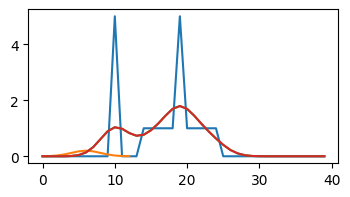

In [78]:
def simple_convolution(signal, kernel):
    N = int(len(kernel) / 2) # kernel of size 2N + 1
    returnSignal = np.zeros(len(signal))
    for i in range(0, len(signal)): # loop through signal
        for j in range(0, 2*N+1): # loop through kenel
            index = i-(j-N)
            if index < 0: # extending edge
                index = 0
            elif index > len(signal)-1:
                index = len(signal)-1
            returnSignal[i] += kernel[j]*signal[index] # weigted sum

    return returnSignal
    

signal = read_data("signal.txt")
kernel = read_data("kernel.txt")
convolvedSignal = simple_convolution(signal, kernel)

f = plt.figure(figsize=(4, 2))
f.add_subplot(1, 1, 1)
plt.plot(signal)
plt.plot(kernel)
plt.plot(convolvedSignal)
plt.plot(cv2.filter2D(signal,-1, kernel=kernel))
plt.show()

# print(simple_convolution(np.array([0,1,1,1,0,0.7,0.5,0.2,0,0,1,0]), np.array([0.5, 1, 0.3]))) 2.a



Question: Can you recognize the shape of the kernel? What is the sum of the
elements in the kernel? How does the kernel affect the signal?


Shape looks like a Gaussian distribution. Should be 1. Probability distribution. Kernel smooths the signal.

### d

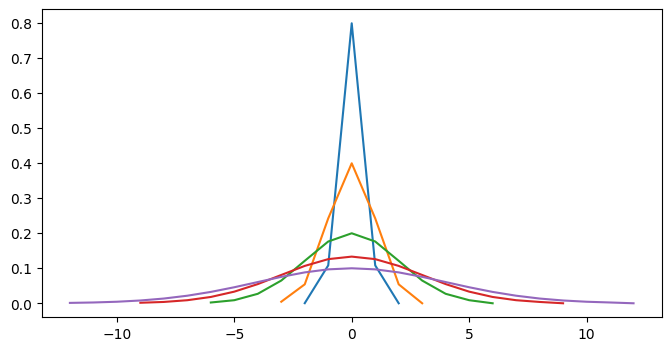

In [113]:
def calculateGaussianKernel(sigma):
    N = int(np.ceil(3 * sigma))
    kernel = np.zeros(2 * N + 1)
    for x in range(-N, N):
        kernel[x+N] = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-x**2 / (2 * (sigma**2)))

    return kernel

gaussian0 = calculateGaussianKernel(0.5)
gaussian1 = calculateGaussianKernel(1)
gaussian2 = calculateGaussianKernel(2)
gaussian3 = calculateGaussianKernel(3)
gaussian4 = calculateGaussianKernel(4)

f = plt.figure(figsize=(8, 4))
f.add_subplot(1, 1, 1)
plt.plot(np.arange(len(gaussian0)) - int(len(gaussian0) / 2), gaussian0)
plt.plot(np.arange(len(gaussian1)) - int(len(gaussian1) / 2), gaussian1)
plt.plot(np.arange(len(gaussian2)) - int(len(gaussian2) / 2), gaussian2)
plt.plot(np.arange(len(gaussian3)) - int(len(gaussian3) / 2), gaussian3)
plt.plot(np.arange(len(gaussian4)) - int(len(gaussian4) / 2), gaussian4)
plt.show()

### e

order does not matter

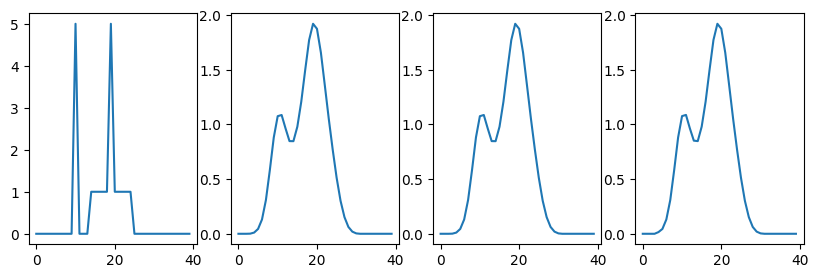

In [111]:
gaussianKernelk1 = calculateGaussianKernel(2)
kernelk2 = np.array([0.1,0.6, 0.4])
combinedKernel = simple_convolution(gaussianKernelk1, kernelk2)

c1 = simple_convolution(simple_convolution(signal, gaussianKernelk1), kernelk2)
c2 = simple_convolution(simple_convolution(signal, kernelk2), gaussianKernelk1)
c3 = simple_convolution(signal, combinedKernel)

f = plt.figure(figsize=(10, 3))
f.add_subplot(1, 4, 1)
plt.plot(signal)
f.add_subplot(1, 4, 2)
plt.plot(c1)
f.add_subplot(1, 4, 3)
plt.plot(c2)
f.add_subplot(1, 4, 4)
plt.plot(c3)
plt.show()